# Imports

In [1]:
from bs4 import BeautifulSoup
# http://akul.me/blog/2016/beautifulsoup-cheatsheet/
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# Data Collection

In [2]:
# https://www.oag.com/busiest-airports-world
data = {
    "ranking" : [i+1 for i in range(10)],
    "airport_code" : ["LHR", "DXB", "AMS", "CDG", "FRA", "IST", "DOH", "LGW", "MAD", "SIN"], 
    "airport_name" : ["London Heathrow", "Dubai International", "Amsterdam", "Paris Charles de Gaulle", "Frankfurt International",
                      "Istanbul", "Doha", "London Gatwick", "Madrid Adolfo Suarez-Barajas", "Singapore Changi"],
    "continent": ["Europe", "Asia","Europe", "Europe", "Europe", "Europe", "Asia", "Europe", "Europe","Asia"],
    "seats" : [3423498, 3209837, 3169524, 2934523, 2789501, 2619036, 2084078, 1965580, 1886306, 1784475]
    }

In [3]:
df = pd.DataFrame(data)
df.head()

,ranking,airport_code,airport_name,continent,seats
0,1,LHR,London Heathrow,Europe,3423498
1,2,DXB,Dubai International,Asia,3209837
2,3,AMS,Amsterdam,Europe,3169524
3,4,CDG,Paris Charles de Gaulle,Europe,2934523
4,5,FRA,Frankfurt International,Europe,2789501


In [4]:
df['seats_in_millions'] = df['seats'] / 1000000
df

,ranking,airport_code,airport_name,continent,seats,seats_in_millions
0,1,LHR,London Heathrow,Europe,3423498,3.423498
1,2,DXB,Dubai International,Asia,3209837,3.209837
2,3,AMS,Amsterdam,Europe,3169524,3.169524
3,4,CDG,Paris Charles de Gaulle,Europe,2934523,2.934523
4,5,FRA,Frankfurt International,Europe,2789501,2.789501
5,6,IST,Istanbul,Europe,2619036,2.619036
6,7,DOH,Doha,Asia,2084078,2.084078
7,8,LGW,London Gatwick,Europe,1965580,1.965580
8,9,MAD,Madrid Adolfo Suarez-Barajas,Europe,1886306,1.886306
9,10,SIN,Singapore Changi,Asia,1784475,1.784475


# Visualisation

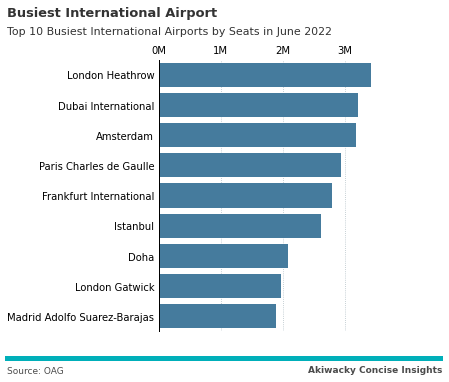

In [5]:
fig, ax = plt.subplots(figsize=(4, 5))

#grid
ax.grid(which="major", axis='x', color='#758D99',  linestyle=':', alpha=0.6, zorder=1)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(1)


# data
ax.barh(df['airport_name'], df['seats_in_millions'], color='#457b9d', zorder=2)

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 8.5)
ax.invert_yaxis()

# Set custom labels for x-axis
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['0M', '1M', '2M', '3M'])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10,       # Set tick label size
                         pad=1)             # Lower tick labels a bit


# Reformat y-axis tick labels
ax.yaxis.set_tick_params(pad=1,            # Pad tick labels so they don't go over y-axis
                         labelsize=10,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left


# Add in line and tag
ax.plot([-0.4, 1.1],                 # Set width of line
        [0.05, 0.05],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#00afb9', 
        linewidth=5)

# Add Logo
ax.text(x=0.97, y=-.125, s='Akiwacky Concise Insights',
        fontsize=9, alpha=.7,weight='bold',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

# Add in title and subtitle
ax.text(x=-0.4, y=1, s="Busiest International Airport", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.4, y=.95, s="Top 10 Busiest International Airports by Seats in June 2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.4, y=0.01, s="Source: OAG", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot
plt.savefig('busiest_airports_world_june.png',    # Set path and filename
            dpi = 300,                            # Set dots per inch
            bbox_inches="tight",                  # Remove extra whitespace around plot
            facecolor='white')                    # Set background color to white


plt.show()